In [36]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import numpy as np
import warnings

In [37]:
warnings.filterwarnings('ignore')

**CIFAR-10 VERİ SETİNİ TANIMA**

- Datasets kütüphanesinden cifar10 veri setini yüklüyoruz.
- Cifar10 veri setinde 10 farklı nesneye ait 60.000 resim bulunmakta
- Veri seti, train ve test olarak 2 gruba ayrılmakta.
- Test ve train setleri eğitim ve test için kullanılmakta ve kendi içinde de giriş değeri ve çıkış değeri olarak ikiye ayrılmakta
- Veri setimizde toplamda 60.000 adet veri bulunmakta ve bunların 50.000'i eğitim, 10.000'i test için kullanılıyor.
- Ve verilerimiz 32x32 boyutunda rgb olarak 3 renk kanalına sahiptir.

In [4]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()
print("Eğitim veri seti sayısı: " + str(X_train.shape[0]))
print("Test veri seti sayısı: " + str(X_test.shape[0]))

Eğitim veri seti sayısı: 50000
Test veri seti sayısı: 10000


In [5]:
X_train.shape #32x32 pixel ve 3 renk kanalına sahip eğitim seti

(50000, 32, 32, 3)

In [6]:
X_test.shape #32x32 pixel ve 3 renk kanalına sahip test seti

(10000, 32, 32, 3)

*Örnek bir veri*

In [7]:
X_train[0] #0-255 değerlere sahip 32x32 boyutunda bir dizi

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
classes = ["uçak","otomobil","kuş","kedi","geyik","köpek","kurbağa","at","gemi","kamyon"] #Sınıf etiketlerini tanımlama

In [9]:
classes[9] #örnek kullanım

'kamyon'

In [10]:
y_train[:5] #eğirim veri setinin hedef indisleri'nin ilk 5 değeri. 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

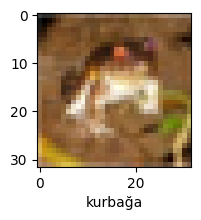

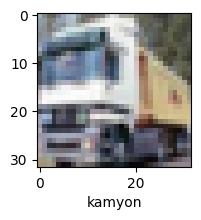

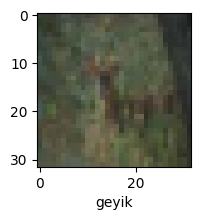

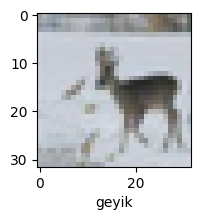

In [46]:
def plot_sample(X,y,index):
    y_temp = y.reshape(-1) #hedef verileri uygun dizi formuna dönüştürme (lineer)
    plt.figure(figsize= (15,2)) #resimin görüntüsünü ayarlama
    plt.imshow(X[index]) #matrisin pyplotlib aracılığıyla çizilmiş hali
    plt.xlabel(classes[y_temp[index]]) #çizim aracının X eksen etiketine eğitim veri setinin hedef değerini alıp yukarıda oluşturduğumuz calsses sınıfından indexine göre yazılı değerini atıyoruz  

plot_sample(X_train,y_train,0) # eitim setindeki 0 indisine ait değer
plot_sample(X_train,y_train,1) # eitim setindeki 1 indisine ait değer 
plot_sample(X_train,y_train,10) # eitim setindeki 10 indisine ait değer
plot_sample(X_train,y_train,20) # eitim setindeki 20 indisine ait değer

**Veri setindeki değerleri normalize etme**

In [47]:
X_train[0]/255 #normalde değerlerimiz 32x32x3 boyutlu dizi içerisinde 0-255 arasındaydı, bu değerleri 0-1 arasına getirmek için normalizasyon işlemi uyguladık

array([[[0.00090734, 0.00095348, 0.00096886],
        [0.00066128, 0.00070742, 0.00069204],
        [0.00076894, 0.00073818, 0.00066128],
        ...,
        [0.00242983, 0.00202999, 0.0016609 ],
        [0.00233756, 0.00192234, 0.00156863],
        [0.00227605, 0.00190696, 0.00158401]],

       [[0.00024606, 0.00030757, 0.00030757],
        [0.        , 0.        , 0.        ],
        [0.00027682, 0.00012303, 0.        ],
        ...,
        [0.00189158, 0.00135333, 0.00084583],
        [0.00183007, 0.00127643, 0.00076894],
        [0.0018762 , 0.00133795, 0.00087659]],

       [[0.00038447, 0.00036909, 0.00032295],
        [0.00024606, 0.00010765, 0.        ],
        [0.00075356, 0.00041522, 0.00012303],
        ...,
        [0.00181469, 0.00129181, 0.00076894],
        [0.00184544, 0.00129181, 0.00076894],
        [0.00167628, 0.00112265, 0.00064591]],

       ...,

       [[0.00319877, 0.00261438, 0.00147636],
        [0.00309112, 0.00235294, 0.00052288],
        [0.00304498, 0

In [13]:
X_train = X_train / 255
X_test = X_test / 255

y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [14]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

***MODEL OLUŞTURMA***

In [16]:
cnn = models.Sequential([

    
    #cnn adımları
    
    layers.Conv2D(filters=16,kernel_size = (3,3), activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [15]:
cnn.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3558 - loss: 1.7333
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5701 - loss: 1.2063
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6314 - loss: 1.0438
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6721 - loss: 0.9246
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7038 - loss: 0.8423
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7337 - loss: 0.7601
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7604 - loss: 0.6828
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7857 - loss: 0.6131
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8098 - loss: 0.5402
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8318 - loss: 0.4778
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8502 - loss: 0.4213
Epoch 12/20
1563/1563 ━━━━━━━━

In [17]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6873 - loss: 1.7857


[1.8045841455459595, 0.6851999759674072]

In [20]:
cnn1 = models.Sequential([

    
    #cnn adımları
    
    layers.Conv2D(filters=64,kernel_size = (4,4), activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),

    layers.Conv2D(filters=64,kernel_size = (4,4), activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),


    #dense
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [21]:
cnn1.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [23]:
cnn1.fit(X_train,y_train,epochs=50)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8130 - loss: 0.5271
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8156 - loss: 0.5211
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8200 - loss: 0.5070
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8232 - loss: 0.5040
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8240 - loss: 0.4970
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8301 - loss: 0.4799
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8320 - loss: 0.4731
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8378 - loss: 0.4587
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8389 - loss: 0.4583
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8364 - loss: 0.4586
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8475 - loss: 0.4374
Epoch 12/20
1563/15

In [24]:
cnn1.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7063 - loss: 1.0470


[1.059158444404602, 0.7074999809265137]

In [28]:
cnn2 = models.Sequential([

    #cnn adımları    
    layers.Conv2D(filters=64,kernel_size = (4,4), activation = 'relu',input_shape = (32,32,3)),
    layers.Conv2D(filters=64,kernel_size = (4,4), activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),

    layers.Conv2D(filters=128,kernel_size = (4,4), activation = 'relu',input_shape = (32,32,3)),
    layers.Conv2D(filters=128,kernel_size = (4,4), activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    #dense
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])

In [29]:
cnn2.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [32]:
cnn2.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.8176 - loss: 0.5281
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.8171 - loss: 0.5280
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.8243 - loss: 0.5159
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.8249 - loss: 0.5162
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.8217 - loss: 0.5232
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.8190 - loss: 0.5299
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.8269 - loss: 0.5118
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.8239 - loss: 0.5142
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.8302 - loss: 0.4936
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.8330 - loss: 0.4864


In [33]:
cnn2.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7444 - loss: 0.8425


[0.8508039116859436, 0.7430999875068665]

In [17]:
cnn3 = models.Sequential([

    #cnn adımları    
    layers.Conv2D(filters=32,kernel_size = (3,3), activation = 'relu',input_shape = (32,32,3),padding='same'),
    BatchNormalization(),
    layers.Conv2D(filters=32,kernel_size = (3,3), activation = 'relu',input_shape = (32,32,3),padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=64,kernel_size = (3,3), activation = 'relu',input_shape = (32,32,3),padding='same'),
    BatchNormalization(),
    layers.Conv2D(filters=64,kernel_size = (3,3), activation = 'relu',input_shape = (32,32,3),padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=128,kernel_size = (3,3), activation = 'relu',input_shape = (32,32,3),padding='same'),
    BatchNormalization(),
    layers.Conv2D(filters=128,kernel_size = (3,3), activation = 'relu',input_shape = (32,32,3),padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),


    #dense
    layers.Flatten(),

    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.25),    
    layers.Dense(10, activation='softmax')
])

In [18]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
cnn3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [19]:
cnn3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [21]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn3.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=METRICS)

In [22]:
r = cnn3.fit(X_train,y_cat_train,epochs=32,validation_data=(X_test,y_cat_test))

Epoch 1/32
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.4094 - loss: 1.8953 - precision: 0.5402 - recall: 0.2459 - val_accuracy: 0.6266 - val_loss: 1.0406 - val_precision: 0.7757 - val_recall: 0.4756
Epoch 2/32
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6482 - loss: 1.0040 - precision: 0.7674 - recall: 0.5353 - val_accuracy: 0.7033 - val_loss: 0.8542 - val_precision: 0.8084 - val_recall: 0.6018
Epoch 3/32
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7218 - loss: 0.8013 - precision: 0.8114 - recall: 0.6345 - val_accuracy: 0.7298 - val_loss: 0.7790 - val_precision: 0.8209 - val_recall: 0.6481
Epoch 4/32
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7564 - loss: 0.7023 - precision: 0.8352 - recall: 0.6840 - val_accuracy: 0.7692 - val_loss: 0.6668 - val_precision: 0.8542 - val_recall: 0.6899
Epoch 5/32
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7818 - loss: 0.6276 - precision: 0.8493 - recall: 0.7215 - val_accuracy: 0

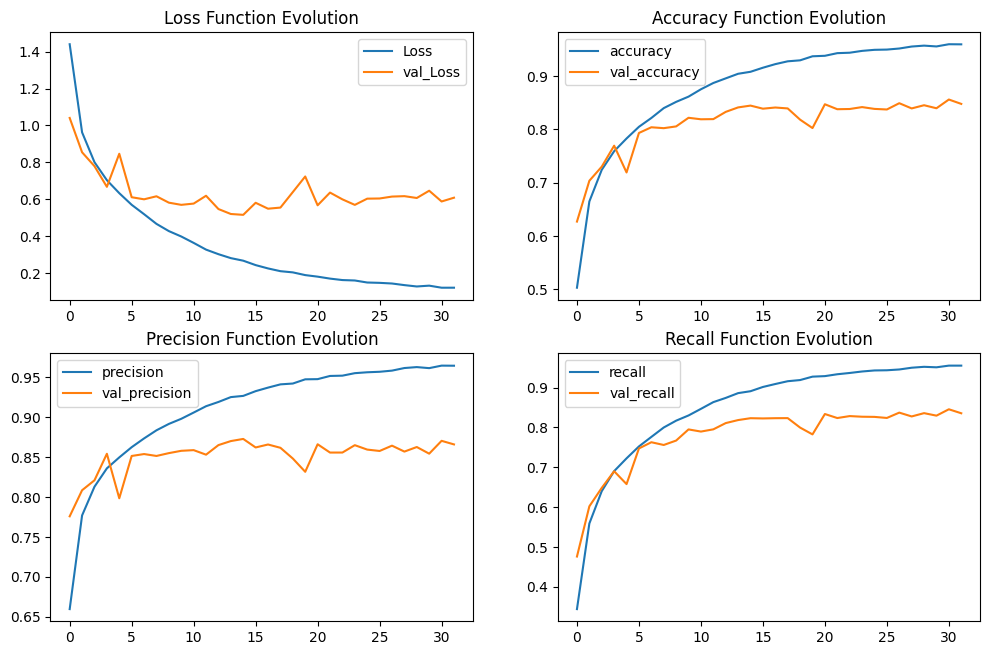

In [27]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [28]:
r.history

{'accuracy': [0.5023800134658813,
  0.6643999814987183,
  0.7238600254058838,
  0.758840024471283,
  0.7827000021934509,
  0.8046600222587585,
  0.8212199807167053,
  0.839739978313446,
  0.8514999747276306,
  0.8613399863243103,
  0.8751599788665771,
  0.8869600296020508,
  0.8956599831581116,
  0.9042800068855286,
  0.90802001953125,
  0.91566002368927,
  0.9223999977111816,
  0.9276999831199646,
  0.9295399785041809,
  0.9371399879455566,
  0.9380599856376648,
  0.9430199861526489,
  0.9438400268554688,
  0.9473000168800354,
  0.9492800235748291,
  0.9497399926185608,
  0.951740026473999,
  0.9554600119590759,
  0.9571599960327148,
  0.9556400179862976,
  0.9597799777984619,
  0.9595800042152405],
 'loss': [1.4405288696289062,
  0.9624451398849487,
  0.8005240559577942,
  0.7028716206550598,
  0.6324487924575806,
  0.5693227052688599,
  0.5184300541877747,
  0.4658530056476593,
  0.42660608887672424,
  0.3973510265350342,
  0.3626400828361511,
  0.3261793553829193,
  0.3013767898082

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8484 - loss: 0.6099 - precision: 0.8659 - recall: 0.8338
Test Accuracy : 84.77%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


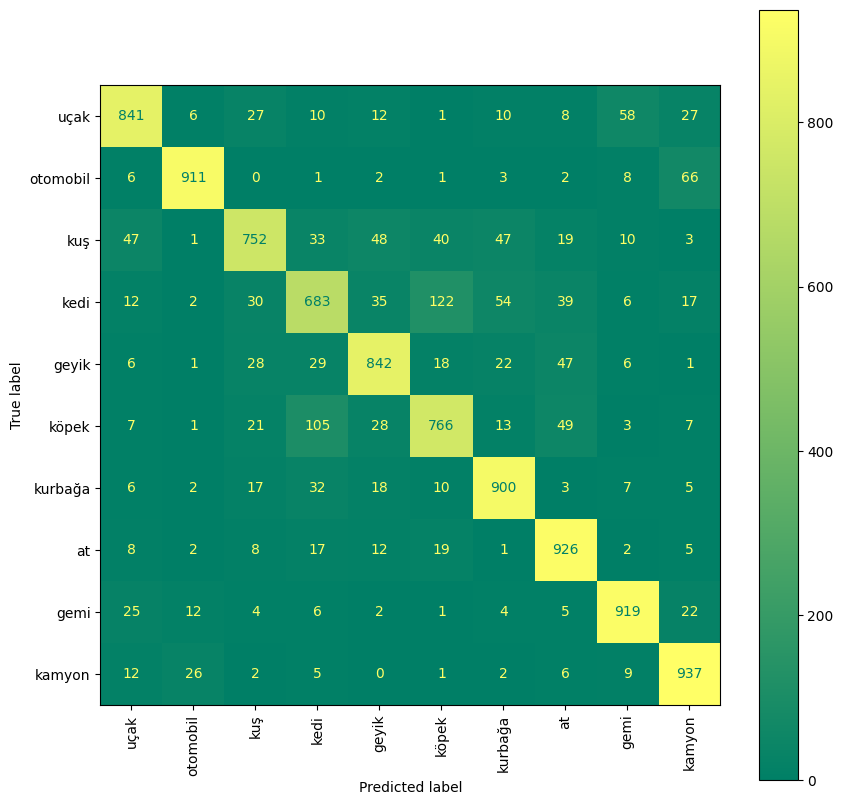

In [39]:
evaluation = cnn3.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = cnn3.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [45]:
classes_with_index = [str(i)+ " : " + classes[i] for i in range(10)]
print(classes_with_index)
print(classification_report(y_test, y_pred))

['0 : uçak', '1 : otomobil', '2 : kuş', '3 : kedi', '4 : geyik', '5 : köpek', '6 : kurbağa', '7 : at', '8 : gemi', '9 : kamyon']
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       0.95      0.91      0.93      1000
           2       0.85      0.75      0.80      1000
           3       0.74      0.68      0.71      1000
           4       0.84      0.84      0.84      1000
           5       0.78      0.77      0.77      1000
           6       0.85      0.90      0.88      1000
           7       0.84      0.93      0.88      1000
           8       0.89      0.92      0.91      1000
           9       0.86      0.94      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

